# PROBLEM 1

### Q1: Read the data as an appropriate Time Series data and plot the data.


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Shoe-Sales (3) (1) (1).csv")

In [ ]:
df.head()

,YearMonth,Shoe_Sales
0,1980-01,85
1,1980-02,89
2,1980-03,109
3,1980-04,95
4,1980-05,91


In [ ]:
df.shape

(187, 2)

In [ ]:
df.describe()

,Shoe_Sales
count,187.000000
mean,245.636364
std,121.390804
min,85.000000
25%,143.500000
50%,220.000000
75%,315.500000
max,662.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YearMonth   187 non-null    object
 1   Shoe_Sales  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


**Let's first convert the `YearMonth` column into DateTime format and then plot the time series data in the form of a line graph.**

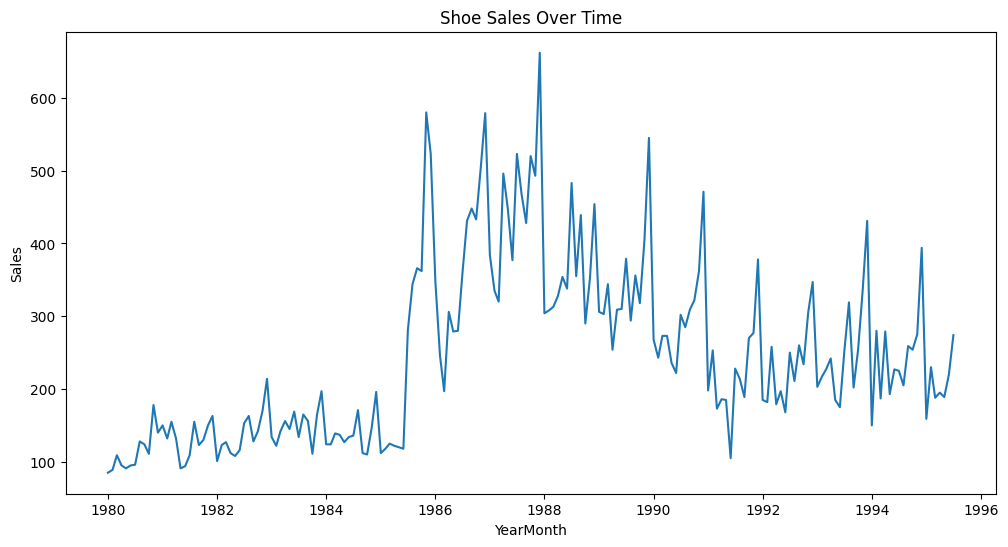

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'YearMonth' column to datetime format and set it as the index
df['YearMonth'] = pd.to_datetime(df['YearMonth'])
df.set_index('YearMonth', inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Shoe_Sales'])
plt.title('Shoe Sales Over Time')
plt.xlabel('YearMonth')
plt.ylabel('Sales')
plt.show()


### Q2: Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.


In [ ]:
df.columns

Index(['Shoe_Sales'], dtype='object')

**Let's view a kde plot of the shoe sales**

Text(0.5, 1.0, 'Kde plot of shoe sales')

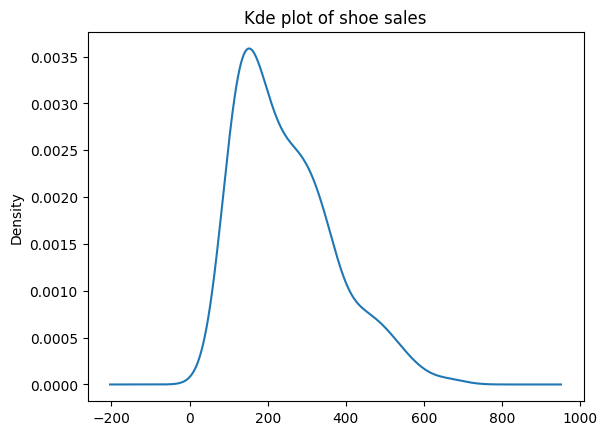

In [ ]:
df['Shoe_Sales'].plot(kind='kde')
plt.title("Kde plot of shoe sales")

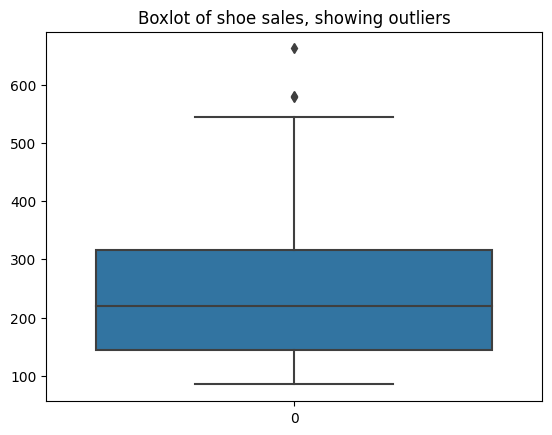

In [ ]:
import seaborn as sns
sns.boxplot(df['Shoe_Sales'])
plt.title("Boxlot of shoe sales, showing outliers");

**Now we will do seasonal decomposition of the dataset `Shoe_Sales` column and plot the trend, seasonal, and residual graph components.**

       Shoe_Sales
count  187.000000
mean   245.636364
std    121.390804
min     85.000000
25%    143.500000
50%    220.000000
75%    315.500000
max    662.000000


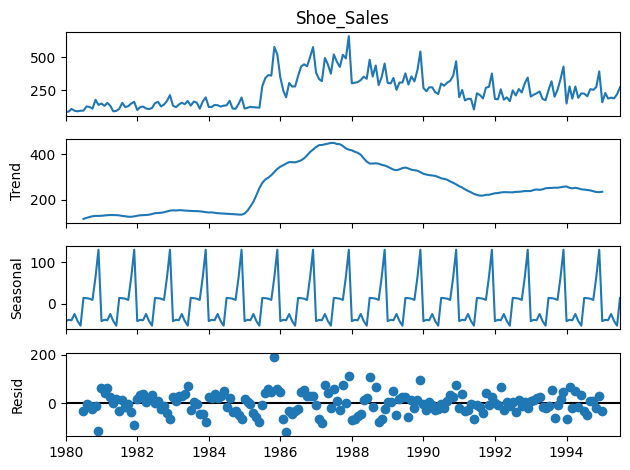

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 2: Perform EDA and decomposition
print(df.describe())
result = seasonal_decompose(df['Shoe_Sales'], model='additive', period=12)
result.plot()
plt.show()

### Q3: Split the data into training and test. The test data should start in 1991.


In [ ]:
# Split the data into training and test sets
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']


### Q4: Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

**The two code cells below instantiates different exponential smoothing models namely, `SimpleExpSmoothing`, `Holt`, `ExponentialSmoothing`as well as machine learning models namely; `Linear regression` and `Naive Bayes`, fits them to our training dataset, makes predictions on the test set, and calculates RMSE for each model on the test set.**

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 4: Build exponential smoothing models and calculate RMSE
ses_model = SimpleExpSmoothing(train).fit()
holt_model = Holt(train).fit()
hwes_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()

ses_forecast = ses_model.forecast(len(test))
holt_forecast = holt_model.forecast(len(test))
hwes_forecast = hwes_model.forecast(len(test))

rmse_ses = np.sqrt(mean_squared_error(test, ses_forecast))
rmse_holt = np.sqrt(mean_squared_error(test, holt_forecast))
rmse_hwes = np.sqrt(mean_squared_error(test, hwes_forecast))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(np.arange(len(train)).reshape(-1, 1), train)
lr_forecast = lr_model.predict(np.arange(len(train), len(train) + len(test)).reshape(-1, 1))
rmse_lr = np.sqrt(mean_squared_error(test, lr_forecast))

naive_forecast = train.iloc[-1]['Shoe_Sales'] * np.ones(len(test))
rmse_naive = np.sqrt(mean_squared_error(test, naive_forecast))

avg_forecast = np.mean(train['Shoe_Sales']) * np.ones(len(test))
rmse_avg = np.sqrt(mean_squared_error(test, avg_forecast))


### Q5: Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.

**The code below will check for the stationarity of the dataset using ADFULLER TEST, with a p_value of 0.05. If the value is less tahn 0.05 then the data is stationary, otherwise it is not stationary.**

**To solve the issue of non-stationarity we implement differencing on the dataset and then again conduct the ADFULLER TEST.**

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Step 5: Check stationarity using ADF test
adf_test = adfuller(train['Shoe_Sales'])
p_value = adf_test[1]

if p_value < 0.05:
    print("The data is stationary.")
else:
    print("The data is non-stationary. Taking differencing steps...")

    # Take first-order differencing
    train_diff = train.diff().dropna()

    # Check stationarity again
    adf_test_diff = adfuller(train_diff['Shoe_Sales'])
    p_value_diff = adf_test_diff[1]

    if p_value_diff < 0.05:
        print("Differenced data is stationary.")
    else:
        print("Differenced data is still non-stationary. Further steps may be needed.")

The data is non-stationary. Taking differencing steps...
Differenced data is stationary.


### Q6: Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

**This code below uses the `auto_arima` function to automatically select the best ARIMA model based on the lowest AIC on the training data and then evaluates the model on the test data using RMSE.**

In [ ]:
! pip install pmdarima

In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Step 6: Fit an automated ARIMA model
best_model = auto_arima(train, seasonal=True, stepwise=True, suppress_warnings=True)
final_arima_model = ARIMA(train, order=best_model.order, seasonal_order=best_model.seasonal_order).fit()

forecast_horizon = len(test)
forecast = final_arima_model.forecast(steps=forecast_horizon)

rmse_arima = np.sqrt(mean_squared_error(test, forecast))

# Print RMSE
print(f"RMSE for ARIMA: {rmse_arima}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE for ARIMA: 142.82073041759352


### Q7: Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.


In [ ]:
# Step 7: Build a summary table
models = ['SES', 'Holt', 'HWES', 'Linear Regression', 'Naive', 'Simple Average', 'ARIMA']
rmse_values = [rmse_ses, rmse_holt, rmse_hwes, rmse_lr, rmse_naive, rmse_avg, rmse_arima]

results_df = pd.DataFrame({'Model': models, 'RMSE': rmse_values})
print(results_df)

               Model        RMSE
0                SES  196.425508
1               Holt  311.020473
2               HWES   83.415171
3  Linear Regression  266.276472
4              Naive  245.121306
5     Simple Average   63.984570
6              ARIMA  142.820730


### Q8: Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.


In [ ]:
# Step 10: Build the most optimum model on complete data and forecast 12 months into the future
complete_data = df  # Use the complete data for forecasting
best_model_complete = auto_arima(complete_data, seasonal=True, stepwise=True, suppress_warnings=True)

final_arima_model_complete = ARIMA(complete_data, order=best_model_complete.order,
                                    seasonal_order=best_model_complete.seasonal_order).fit()

forecast_horizon_complete = 12  # Forecasting 12 months into the future

# Forecast with confidence intervals
forecast_results = final_arima_model_complete.get_forecast(steps=forecast_horizon_complete, alpha=0.05)

# Extract forecasted values and confidence intervals
forecast_complete = forecast_results.predicted_mean
conf_int_complete = forecast_results.conf_int()

In [ ]:
# Print the forecasted values
print("ARIMA Forecast for 12 months into the future:")
print(forecast_complete)

ARIMA Forecast for 12 months into the future:
1995-08-01    249.265399
1995-09-01    240.776776
1995-10-01    237.863581
1995-11-01    236.863806
1995-12-01    236.520696
1996-01-01    236.402944
1996-02-01    236.362533
1996-03-01    236.348664
1996-04-01    236.343905
1996-05-01    236.342272
1996-06-01    236.341711
1996-07-01    236.341519
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
# Print the confidence intervals
print("\nConfidence Intervals:")
print(conf_int_complete)


Confidence Intervals:
            lower Shoe_Sales  upper Shoe_Sales
1995-08-01        108.073760        390.457039
1995-09-01         81.687299        399.866253
1995-10-01         71.097672        404.629489
1995-11-01         64.885686        408.841927
1995-12-01         60.114839        412.926552
1996-01-01         55.880095        416.925793
1996-02-01         51.881366        420.843700
1996-03-01         48.014694        424.682635
1996-04-01         44.241890        428.445920
1996-05-01         40.547239        432.137304
1996-06-01         36.922890        435.760532
1996-07-01         33.363881        439.319156


### Q9: Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.


Based on the ARIMA model built on the complete data and the 12-month forecast with confidence intervals, here are some observations and recommendations:

1. Forecasted Sales: The ARIMA model forecasts future shoe sales for the next 12 months. For example, it predicts that sales in August 1995 will be approximately 249 units.

2. Confidence Intervals: The confidence intervals provide a range of values within which the actual sales are likely to fall. For August 1995, the model predicts sales to be between approximately 108 and 390 units, with 95% confidence.

3. Seasonal Patterns: The seasonal decomposition analysis performed earlier revealed strong seasonality in the data, with sales patterns repeating approximately every 12 months. This seasonality is reflected in the forecast.

Recommendations:

1. Inventory Planning: Given the seasonal nature of shoe sales, the company should plan its inventory accordingly. They should stock up on popular styles and sizes before peak sales seasons to avoid stockouts and lost sales.

2. Marketing and Promotions: The company can use the forecasted sales to plan marketing campaigns and promotions strategically. For example, they can run advertising campaigns and discounts before the start of peak sales seasons to attract customers.

3. Monitoring and Adjusting: Continuously monitor actual sales against the forecasts. If there are significant deviations, consider adjusting inventory and marketing strategies accordingly.

4. Financial Planning: Accurate sales forecasts are essential for financial planning, including budgeting and cash flow management. The company should align its financial plans with the forecasted sales trends.


In [ ]:
LE

# PROBLEM 2

### Q1: Read the data as an appropriate Time Series data and plot the data.


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/SoftDrink (3) (1) (1).csv")

In [ ]:
df.head()

,YearMonth,SoftDrinkProduction
0,1980-01,1954
1,1980-02,2302
2,1980-03,3054
3,1980-04,2414
4,1980-05,2226


In [ ]:
df.shape

(187, 2)

In [ ]:
df.describe()

,SoftDrinkProduction
count,187.000000
mean,3262.609626
std,728.357367
min,1954.000000
25%,2748.000000
50%,3134.000000
75%,3741.000000
max,5725.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   YearMonth            187 non-null    object
 1   SoftDrinkProduction  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


**Let's first convert the `YearMonth` column into DateTime format and then plot the time series data in the form of a line graph.**

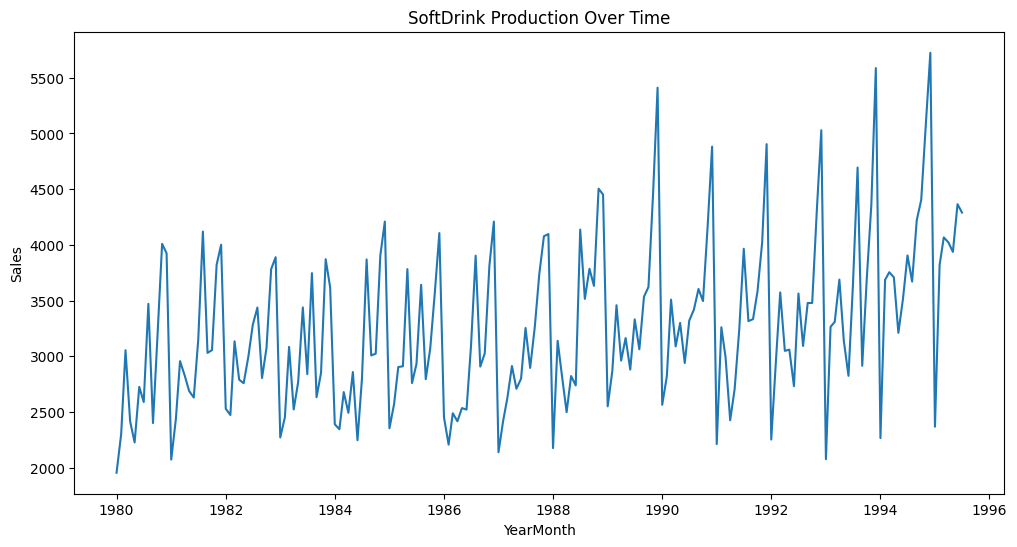

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'YearMonth' column to datetime format and set it as the index
df['YearMonth'] = pd.to_datetime(df['YearMonth'])
df.set_index('YearMonth', inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['SoftDrinkProduction'])
plt.title('SoftDrink Production Over Time')
plt.xlabel('YearMonth')
plt.ylabel('Sales')
plt.show()


### Q2: Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.


In [ ]:
df.columns

Index(['SoftDrinkProduction'], dtype='object')

**Let's view a kde plot of the shoe sales**

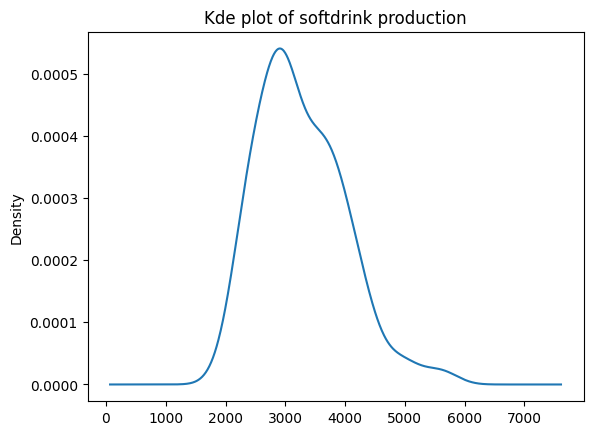

In [ ]:
df['SoftDrinkProduction'].plot(kind='kde')
plt.title("Kde plot of softdrink production");

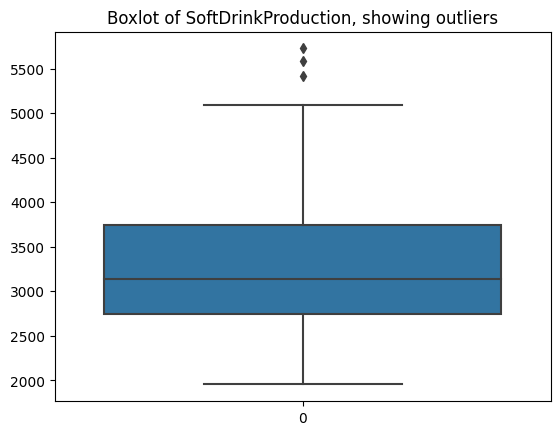

In [ ]:
import seaborn as sns
sns.boxplot(df['SoftDrinkProduction'])
plt.title("Boxlot of SoftDrinkProduction, showing outliers");

**Now we will do seasonal decomposition of the dataset `Shoe_Sales` column and plot the trend, seasonal, and residual graph components.**

       SoftDrinkProduction
count           187.000000
mean           3262.609626
std             728.357367
min            1954.000000
25%            2748.000000
50%            3134.000000
75%            3741.000000
max            5725.000000


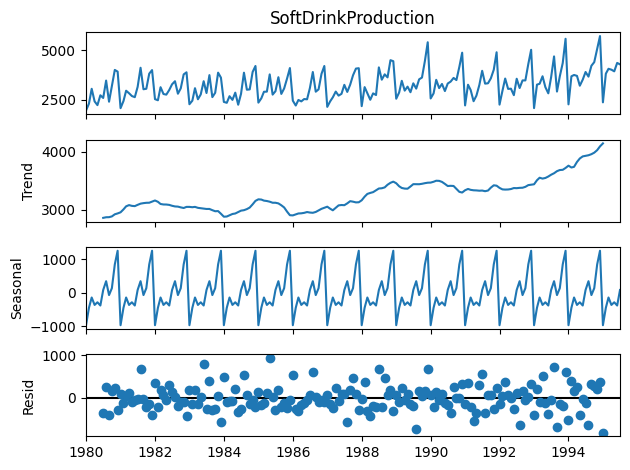

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 2: Perform EDA and decomposition
print(df.describe())
result = seasonal_decompose(df['SoftDrinkProduction'], model='additive', period=12)
result.plot()
plt.show()

### Q3: Split the data into training and test. The test data should start in 1991.


In [ ]:
# Split the data into training and test sets
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']


### Q4: Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

**The two code cells below instantiates different exponential smoothing models namely, `SimpleExpSmoothing`, `Holt`, `ExponentialSmoothing`as well as machine learning models namely; `Linear regression` and `Naive Bayes`, fits them to our training dataset, makes predictions on the test set, and calculates RMSE for each model on the test set.**

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 4: Build exponential smoothing models and calculate RMSE
ses_model = SimpleExpSmoothing(train).fit()
holt_model = Holt(train).fit()
hwes_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()

ses_forecast = ses_model.forecast(len(test))
holt_forecast = holt_model.forecast(len(test))
hwes_forecast = hwes_model.forecast(len(test))

rmse_ses = np.sqrt(mean_squared_error(test, ses_forecast))
rmse_holt = np.sqrt(mean_squared_error(test, holt_forecast))
rmse_hwes = np.sqrt(mean_squared_error(test, hwes_forecast))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(np.arange(len(train)).reshape(-1, 1), train)
lr_forecast = lr_model.predict(np.arange(len(train), len(train) + len(test)).reshape(-1, 1))
rmse_lr = np.sqrt(mean_squared_error(test, lr_forecast))

naive_forecast = train.iloc[-1]['SoftDrinkProduction'] * np.ones(len(test))
rmse_naive = np.sqrt(mean_squared_error(test, naive_forecast))

avg_forecast = np.mean(train['SoftDrinkProduction']) * np.ones(len(test))
rmse_avg = np.sqrt(mean_squared_error(test, avg_forecast))


### Q5: Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.

**The code below will check for the stationarity of the dataset using ADFULLER TEST, with a p_value of 0.05. If the value is less tahn 0.05 then the data is stationary, otherwise it is not stationary.**

**To solve the issue of non-stationarity we implement differencing on the dataset and then again conduct the ADFULLER TEST.**

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Step 5: Check stationarity using ADF test
adf_test = adfuller(train['SoftDrinkProduction'])
p_value = adf_test[1]

if p_value < 0.05:
    print("The data is stationary.")
else:
    print("The data is non-stationary. Taking differencing steps...")

    # Take first-order differencing
    train_diff = train.diff().dropna()

    # Check stationarity again
    adf_test_diff = adfuller(train_diff['SoftDrinkProduction'])
    p_value_diff = adf_test_diff[1]

    if p_value_diff < 0.05:
        print("Differenced data is stationary.")
    else:
        print("Differenced data is still non-stationary. Further steps may be needed.")

The data is non-stationary. Taking differencing steps...
Differenced data is stationary.


### Q6: Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

**This code below uses the `auto_arima` function to automatically select the best ARIMA model based on the lowest AIC on the training data and then evaluates the model on the test data using RMSE.**

In [ ]:
! pip install pmdarima

In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Step 6: Fit an automated ARIMA model
best_model = auto_arima(train, seasonal=True, stepwise=True, suppress_warnings=True)
final_arima_model = ARIMA(train, order=best_model.order, seasonal_order=best_model.seasonal_order).fit()

forecast_horizon = len(test)
forecast = final_arima_model.forecast(steps=forecast_horizon)

rmse_arima = np.sqrt(mean_squared_error(test, forecast))

# Print RMSE
print(f"RMSE for ARIMA: {rmse_arima}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE for ARIMA: 828.9693289644663


### Q7: Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.


In [ ]:
# Step 7: Build a summary table
models = ['SES', 'Holt', 'HWES', 'Linear Regression', 'Naive', 'Simple Average', 'ARIMA']
rmse_values = [rmse_ses, rmse_holt, rmse_hwes, rmse_lr, rmse_naive, rmse_avg, rmse_arima]

results_df = pd.DataFrame({'Model': models, 'RMSE': rmse_values})
print(results_df)

               Model         RMSE
0                SES   819.401216
1               Holt  2819.132663
2               HWES   544.334329
3  Linear Regression   775.807810
4              Naive  1519.259233
5     Simple Average   934.353358
6              ARIMA   828.969329


### Q8: Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.


In [ ]:
# Step 10: Build the most optimum model on complete data and forecast 12 months into the future
complete_data = df  # Use the complete data for forecasting
best_model_complete = auto_arima(complete_data, seasonal=True, stepwise=True, suppress_warnings=True)

final_arima_model_complete = ARIMA(complete_data, order=best_model_complete.order,
                                    seasonal_order=best_model_complete.seasonal_order).fit()

forecast_horizon_complete = 12  # Forecasting 12 months into the future

# Forecast with confidence intervals
forecast_results = final_arima_model_complete.get_forecast(steps=forecast_horizon_complete, alpha=0.05)

# Extract forecasted values and confidence intervals
forecast_complete = forecast_results.predicted_mean
conf_int_complete = forecast_results.conf_int()




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
# Print the forecasted values
print("ARIMA Forecast for 12 months into the future:")
print(forecast_complete)

ARIMA Forecast for 12 months into the future:
1995-08-01    3907.405846
1995-09-01    3855.212804
1995-10-01    3902.412288
1995-11-01    3917.814753
1995-12-01    3913.471021
1996-01-01    3910.507355
1996-02-01    3910.651961
1996-03-01    3911.108157
1996-04-01    3911.162342
1996-05-01    3911.104734
1996-06-01    3911.087323
1996-07-01    3911.092854
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
# Print the confidence intervals
print("\nConfidence Intervals:")
print(conf_int_complete)


Confidence Intervals:
            lower SoftDrinkProduction  upper SoftDrinkProduction
1995-08-01                2595.322244                5219.489448
1995-09-01                2507.319557                5203.106052
1995-10-01                2553.651823                5251.172754
1995-11-01                2568.487248                5267.142257
1995-12-01                2560.015635                5266.926408
1996-01-01                2553.074356                5267.940355
1996-02-01                2549.978986                5271.324936
1996-03-01                2547.297789                5274.918525
1996-04-01                2544.138099                5278.186584
1996-05-01                2540.846372                5281.363096
1996-06-01                2537.610152                5284.564494
1996-07-01                2534.409701                5287.776007


### Q9: Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.


Based on the ARIMA model built for soft drink production and the 12-month forecast with confidence intervals, here are some observations and recommendations:

1. Forecasted Production: The ARIMA model forecasts future soft drink production for the next 12 months. For example, it predicts that production in August 1995 will be approximately 3,907 units.

2. Confidence Intervals: The confidence intervals provide a range of values within which the actual production is likely to fall. For August 1995, the model predicts production to be between approximately 2,595 and 5,219 units, with 95% confidence.

3. Steady Growth: The forecasted production values appear to show a relatively steady growth pattern over the next 12 months, with only slight fluctuations. This suggests a stable and predictable production trend.

Recommendations:

1. Production Planning: The company should use the forecasted production values to plan their manufacturing processes and ensure that they have the necessary resources and capacity to meet demand.

2. Inventory Management: With the forecasted production numbers in hand, the company can manage its inventory effectively. It should align its inventory levels with the expected production and demand to avoid overstocking or stockouts.

3. Marketing and Promotion: If there are specific seasons or events that drive increased soft drink consumption, the company should plan marketing and promotional activities accordingly to maximize sales during those periods.

4. Risk Management: Identify potential risks to production, such as supply chain disruptions or changes in consumer behavior, and develop contingency plans to mitigate these risks.

5. Long-Term Planning: While the ARIMA model provides short-term forecasts, the company should also engage in long-term strategic planning, considering factors like market expansion, new product development, and international growth.